### Open tracking data file and parse raw protobuf data

In [2]:
# pandas, matplotlib, numpy, protobuf
import trackingDataPb_pb2

# open protobuf file
with open("data/test/yhu_backhand_01out.pb", "rb") as f:
    # create tracking data object
    tracking_data = trackingDataPb_pb2.trackingData()
    
    # parse string from file
    tracking_data.ParseFromString(f.read())

type(tracking_data)

trackingDataPb_pb2.trackingData

### Check video metadata

In [3]:
tracking_data.videoMeta

frameRate: 30
resX: 1080
resY: 1920

### Check number of frames in video

In [4]:
len(tracking_data.frameData)

142

### How long is the video?

In [5]:
print(f"Video is {len(tracking_data.frameData) / tracking_data.videoMeta.frameRate:.2f} seconds long")

Video is 4.73 seconds long


### Which frame contains the first tracking data?

In [6]:

for i, frame in enumerate(tracking_data.frameData):
    if frame.poseData:
        print(i)
        break

0


### Draw a skeleton in frame 0

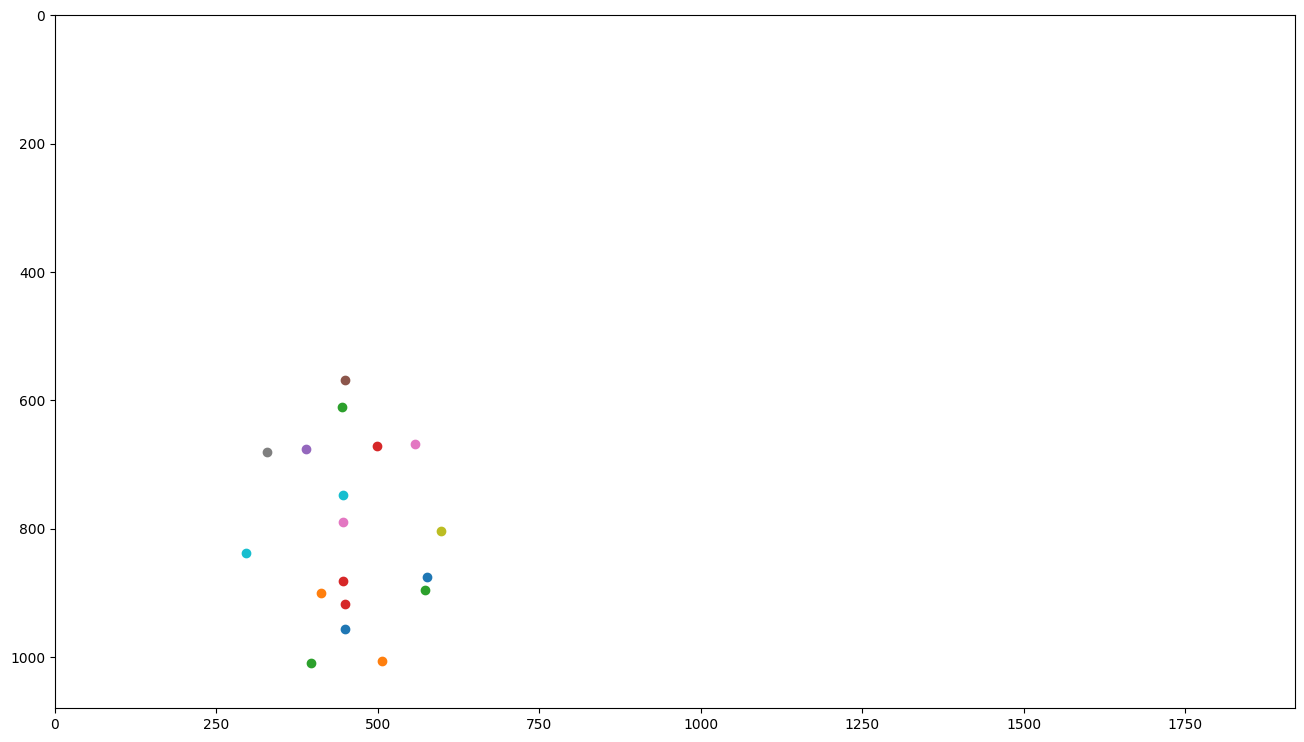

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

ax.set_xlim([0, 1920])
ax.set_ylim([1080, 0])

for kp in tracking_data.frameData[0].poseData[0].keyPoints:
    ax.scatter(kp.posX, kp.posY)


### Parse tracking data as pandas dataframe

In [9]:
import pandas as pd

# initialize empty array
df = []

# for each frame in our tracking data
for frame in tracking_data.frameData:
    # for each pose in each frame
    for pose in frame.poseData:
        # for each keypoint in each pose
        for keypoint in pose.keyPoints:
            # add frame and keypoint information to array
            df.append([frame.index, pose.id, keypoint.type, keypoint.posX, keypoint.posY, keypoint.absPosX, keypoint.absPosY, keypoint.absPosZ])

df = pd.DataFrame(df, columns=["frame", "pose", "keypoint", "x", "y", "absX", "absY", "absZ"])
df

,frame,pose,keypoint,x,y,absX,absY,absZ
0,0,0,0,449.876251,957.025940,-144.695053,-4.774857,3305.317139
1,0,0,1,506.099335,1006.852661,-54.654957,75.536270,3319.096191
2,0,0,2,396.422089,1009.523560,-230.250198,79.418968,3301.498047
3,0,0,3,446.882233,882.017883,-150.574036,-126.099228,3329.018311
4,0,0,4,542.711609,1247.261719,4.363452,462.252045,3312.834473
...,...,...,...,...,...,...,...,...
3403,141,0,19,671.669312,558.258789,184.732346,-563.643738,2888.397949
3404,141,0,20,878.368225,540.074463,460.740234,-571.793091,2803.271973
3405,141,0,21,795.202332,556.701233,342.412018,-541.117065,2762.250244
3406,141,0,22,857.382690,541.135986,419.162842,-553.187805,2718.931152


### Change data format to one row per frame and pose

In [10]:
dfp = df.pivot(index=["frame", "pose"], columns="keypoint", values=["x", "y", "absX", "absY", "absZ"])
dfp = dfp.swaplevel(axis=1)
dfp

,keypoint,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
,,x,x,x,x,x,x,x,x,x,x,...,absZ,absZ,absZ,absZ,absZ,absZ,absZ,absZ,absZ,absZ
frame,pose,,,,,,,,,,,,,,,,,,,,,
0,0,449.876251,506.099335,396.422089,446.882233,542.711609,375.048523,446.767517,555.586304,370.381531,446.196106,...,3235.935791,3162.763672,3301.447754,3201.209717,3409.836426,3213.616699,3231.144043,3088.426758,3148.737549,3017.824707
1,0,449.385498,505.541595,396.492767,446.218750,542.935181,375.726562,446.684753,555.897217,370.999878,446.200531,...,3240.247803,3166.643555,3308.496826,3201.604736,3416.663574,3198.114746,3228.428467,3081.729736,3140.110107,3014.480225
2,0,449.148865,505.239685,396.632019,445.168945,542.602356,375.668274,445.799744,555.690125,370.286926,445.441467,...,3232.558105,3161.404785,3305.115234,3189.572754,3409.166504,3174.052002,3215.550781,3069.441895,3124.645996,3004.947754
3,0,449.449097,505.392731,397.610657,445.434265,542.587830,375.050781,445.230469,555.042480,370.382446,445.325806,...,3222.419434,3155.683350,3311.004395,3175.156250,3437.556641,3150.630371,3239.842041,3063.866699,3153.843994,3008.385498
4,0,450.190704,505.590240,397.960876,446.119904,542.010010,375.069397,446.657166,555.658997,371.111023,446.982117,...,3228.234619,3162.261230,3322.170654,3178.775146,3442.144043,3145.879395,3225.676514,3062.722900,3133.826904,3007.597900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0,735.822815,790.165039,675.246155,739.686707,789.947571,627.100464,747.716797,762.612183,583.852722,751.155945,...,3004.386963,2904.651123,3048.891602,2965.382324,3174.568848,2958.873535,2996.781738,2836.473633,2907.815918,2765.540039
138,0,742.607788,796.852173,681.906860,746.902283,796.187500,633.870361,753.854797,768.948364,590.776001,757.331665,...,3001.483643,2900.422852,3042.676514,2963.160889,3169.898682,2957.455566,2998.608887,2834.167725,2912.209229,2761.561768


### Show progression of first keypoint through the video

<Axes: xlabel='frame,pose'>

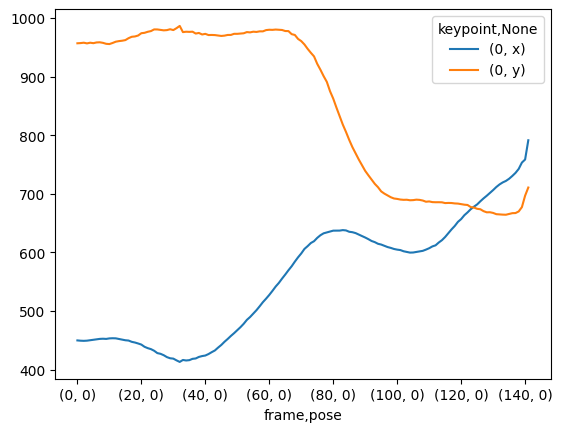

In [11]:
kp0 = dfp.loc[:,pd.IndexSlice[[0],["x", "y"]]]
kp0.plot()

### Calculate pixel speed of keypoint 0 through the video

In [10]:
# get data and shift by one
kp0_shifted = pd.concat([kp0, kp0.shift(1)], axis=1)

def euclidean_distance(x):
    return ((x.iloc[0] - x.iloc[2]) ** 2 + (x.iloc[1] - x.iloc[3]) ** 2) ** 0.5

velocity = kp0_shifted.apply(lambda x: euclidean_distance(x), axis=1).mean() * tracking_data.videoMeta.frameRate

print(f"Velocity in video is {velocity:.0f} pixels per second")

Velocity in video is 93 pixels per second
